<a href="https://colab.research.google.com/github/khaled-kk/Computer-Architecture/blob/main/CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
pip install myhdl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install myhdlpeek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from myhdl import *
from myhdlpeek import Peeker

In [ ]:
def pc(mux3out, pcout,clk):

  @always(clk.posedge)
  def pc_logic():
    pcout.next = mux3out
  return instances()

In [ ]:
def add1(addout1, pcout):

  @always_comb
  def add1_logic():
    addout1.next = pcout + 1

  return instances()

In [ ]:
def insmemory(pcout,instruction,clk):

  arr=[Signal(intbv(0)[32:])]*100

  file = open("/content/gdrive/MyDrive/instructions2.txt","r")
  for x in range(0,22):
    arr[x]=file.readline()

  @always(clk.negedge)
  def insmemory_logic():
    instruction.next=intbv(arr[pcout])

  return instances()

In [ ]:
def decode(instruction,Opcode,readreg1,readreg2,ins4,sginin,Funct):

  @always(instruction)
  def decode_logic():

    Opcode.next=instruction[32:26]

    readreg1.next=instruction[26:21]

    readreg2.next=instruction[21:16]

    ins4.next=instruction[16:11]

    sginin.next=instruction[16:0]

    Funct.next=instruction[6:0]


  return instances()

In [ ]:

def Control(Opcode,Funct,RegDst, RegWrite, ALUSrc,ALUOp, MemWrite,MemRead,MemToReg,branch):

  @always_comb
  def Control_logic():
    if Opcode == 0:
      if Funct == 32 :
        #ADD
        RegDst.next=1
        RegWrite.next=1
        ALUSrc.next=0
        ALUOp.next=2
        MemWrite.next=0
        MemRead.next=0
        MemToReg.next=0
        branch.next=0
      else:
        if Funct==34:
          #SUB
          RegDst.next=1
          RegWrite.next=1
          ALUSrc.next=0
          ALUOp.next=6
          MemWrite.next=0
          MemRead.next=0
          MemToReg.next=0
          branch.next=0
        else:
          if Funct==54:
            #AND
            RegDst.next=1
            RegWrite.next=1
            ALUSrc.next=0
            ALUOp.next=0
            MemWrite.next=0
            MemRead.next=0
            MemToReg.next=0
            branch.next=0
          else:
            if Funct==55:
              #OR
              RegDst.next=1
              RegWrite.next=1
              ALUSrc.next=0
              ALUOp.next=1
              MemWrite.next=0
              MemRead.next=0
              MemToReg.next=0
              branch.next=0
            else:
              if Funct==56:
                #XOR
                RegDst.next=1
                RegWrite.next=1
                ALUSrc.next=0
                ALUOp.next=3
                MemWrite.next=0
                MemRead.next=0
                MemToReg.next=0
                branch.next=0
    else:
      if Opcode==8:
        #ADDI
        RegDst.next=0
        RegWrite.next=1
        ALUSrc.next=1
        ALUOp.next=2
        MemWrite.next=0
        MemRead.next=0
        MemToReg.next=0
        branch.next=0
      else:
        if Opcode==36:
          #SUBI
          RegDst.next=0
          RegWrite.next=1
          ALUSrc.next=1
          ALUOp.next=6
          MemWrite.next=0
          MemRead.next=0
          MemToReg.next=0
          branch.next=0
        else:
          if Opcode==35:
            #LW
            RegDst.next=0
            RegWrite.next=1
            ALUSrc.next=1
            ALUOp.next=2
            MemWrite.next=0
            MemRead.next=1
            MemToReg.next=1
            branch.next=0
          else:
            if Opcode==43:
              #SW
              RegWrite.next=0
              ALUSrc.next=1
              ALUOp.next=2
              MemWrite.next=1
              MemRead.next=0
              branch.next=0
            else:
              if Opcode==4:
                #BRQ
                RegWrite.next=0
                ALUSrc.next=0
                ALUOp.next=6
                MemWrite.next=0
                MemRead.next=0
                branch.next=1
                RegDst.next=1

  return instances()

In [ ]:
def mux1(readreg2, ins4,RegDst,writereg):

  @always_comb
  def mux1_logic():
    if RegDst == 0:
      writereg.next = readreg2
    else:
      writereg.next = ins4

  return instances()

In [ ]:
def registers(readreg1,readreg2,writereg,writdata,RegWrite,readdata1,readdata2,clk):

  arr=[Signal(intbv(0))]*32

  file = open("/content/gdrive/MyDrive/registerfile.txt","r")
  for x in range(0,32):
    arr[x]=file.readline()

  @always(clk.negedge)
  def registersread_logic():
    readdata1.next=int(arr[int(readreg1)])
    readdata2.next=int(arr[int(readreg2)])


  @always(clk.posedge)
  def registerswrite_logic():
    if RegWrite == 1:
      intbv(int(arr[writereg])).next=writdata

  return instances()

In [ ]:
def signextend(sginin,signout):

  @always_comb
  def signextend_logic():
    signout.next = sginin

  return instances()

In [ ]:
def mux2(readdata2, signout, ALUSrc,mux2out):

  @always_comb
  def mux2_logic():
    if ALUSrc == 0:
      mux2out.next = readdata2
    else:
      mux2out.next = signout

  return instances()

In [ ]:
def ALU(readdata1,mux2out,ALUOp,ALUres,zero):

  @always_comb
  def ALU_logic():
    if ALUOp == 2 :
      #ADD
      #ADDI
      #lw
      #sw
      ALUres.next = int(readdata1+mux2out)
    else:
      if ALUOp == 6:
        #SUB
        #BEQ0
        #SUBI
        ALUres.next = int(readdata1-mux2out)
      else:
        if ALUOp == 0 :
          #AND
          ALUres.next = int(readdata1&mux2out)
        else:
          if ALUOp == 1 :
            #OR
            ALUres.next = int(readdata1|mux2out)
          else:
            if ALUOp == 3 :
              #XOR
              ALUres.next = int(readdata1^mux2out)

  if ALUres == 0 :
    zero.next=1
  return instances()

In [ ]:
def shift(signout, shiftleft ):

  @always_comb
  def shift_logic():
    shiftleft.next = signout<<2

  return instances()

In [ ]:
def add2(addout1, shiftleft, addout2):

  @always_comb
  def add2_logic():
    addout2.next = addout1 + shiftleft

  return instances()

In [ ]:
def mux3(addout1,addout2,zero,branch,mux3out):

  @always_comb
  def mux3_logic():
    sel=branch&zero
    if sel == 0:
      mux3out.next = addout1
    else:
      mux3out.next = addout2


  return instances()

In [ ]:
def datamemory(ALUres,readdata2,MemWrite,MemRead,Memdata,clk):

  arr=[Signal(intbv(0)[32:])]*100

  @always(clk.negedge)
  def datamemoryread_logic():
    if MemRead == 1:
      Memdata.next=arr[ALUres]

  @always(clk.posedge)
  def datamemorywrite_logic():
    if MemWrite == 1:
      arr[ALUres].next=readdata2

  return instances()

In [ ]:
def mux4(Memdata,ALUres,MemToReg,writdata):

  @always_comb
  def mux4_logic():
    if MemToReg == 0:
      writdata.next = ALUres
    else:
      writdata.next = Memdata

  return instances()

In [ ]:
mux3out = Signal(intbv(0))
clk = Signal(intbv(0))
pcout = Signal(intbv(-1))
addout1 = Signal(intbv(0))
instruction = Signal(intbv(0)[32:])
Opcode = Signal(intbv(0))
readreg1 = Signal(intbv(0))
readreg2 = Signal(intbv(0))
ins4 =Signal(intbv(0))
sginin = Signal(intbv(0))
Funct = Signal(intbv(0))
RegDst = Signal(intbv(0))
RegWrite = Signal(intbv(0))
ALUSrc = Signal(intbv(0))
ALUOp = Signal(intbv(0))
MemWrite = Signal(intbv(0))
MemRead = Signal(intbv(0))
MemToReg = Signal(intbv(0))
branch = Signal(intbv(0))
writereg = Signal(intbv(0))
writdata = Signal(intbv(0))
readdata1 = Signal(intbv(0))
readdata2 = Signal(intbv(0))
signout = Signal(intbv(0)[32:])
mux2out = Signal(intbv(0))
ALUres = Signal(intbv(0))
zero = Signal(intbv(0))
shiftleft = Signal(intbv(0))
addout2 = Signal(intbv(0))
Memdata = Signal(intbv(0))


pc
add1
insmemory
decode
Control
mux1
registers
signextend
mux2
ALU
shift
add2
mux3
datamemory
mux4


<class 'myhdl.StopSimulation'>: No more events


Time,ALUOp,ALUSrc,ALUres,Funct,MemRead,MemToReg,MemWrite,Memdata,Opcode,RegDst,RegWrite,addout1,addout2,branch,clk,ins4,instruction,mux2out,mux3out,pcout,readdata1,readdata2,readreg1,readreg2,sginin,shiftleft,signout,writdata,writereg,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00000000,0,0,-1,0,0,0,0,0,0,00000000,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,00000000,0,1,0,0,0,0,0,0,0,00000000,0,0,0
2,2,0,8,20,0,0,0,0,0,1,1,1,1a081,0,0,d,018a6820,4,1,0,4,4,c,a,6820,1a080,00006820,8,d,0
3,2,0,8,20,0,0,0,0,0,1,1,2,1a082,0,1,d,018a6820,4,2,1,4,4,c,a,6820,1a080,00006820,8,d,0
4,2,0,3c,20,0,0,0,0,0,1,1,2,1a082,0,0,d,018a6820,37,2,1,5,37,c,a,6820,1a080,00006820,3c,d,0
5,2,0,3c,20,0,0,0,0,0,1,1,3,1a083,0,1,d,018a6820,37,3,2,5,37,c,a,6820,1a080,00006820,3c,d,0
6,6,0,-32,22,0,0,0,0,0,1,1,3,1e08b,0,0,f,01ad7822,37,3,2,5,37,d,d,7822,1e088,00007822,-32,f,0
7,6,0,-32,22,0,0,0,0,0,1,1,4,1e08c,0,1,f,01ad7822,37,4,3,5,37,d,d,7822,1e088,00007822,-32,f,0
8,6,0,0,22,0,0,0,0,0,1,1,4,1e08c,0,0,f,01ad7822,41,4,3,41,41,d,d,7822,1e088,00007822,0,f,0
9,6,0,0,22,0,0,0,0,0,1,1,5,1e08d,0,1,f,01ad7822,41,5,4,41,41,d,d,7822,1e088,00007822,0,f,0


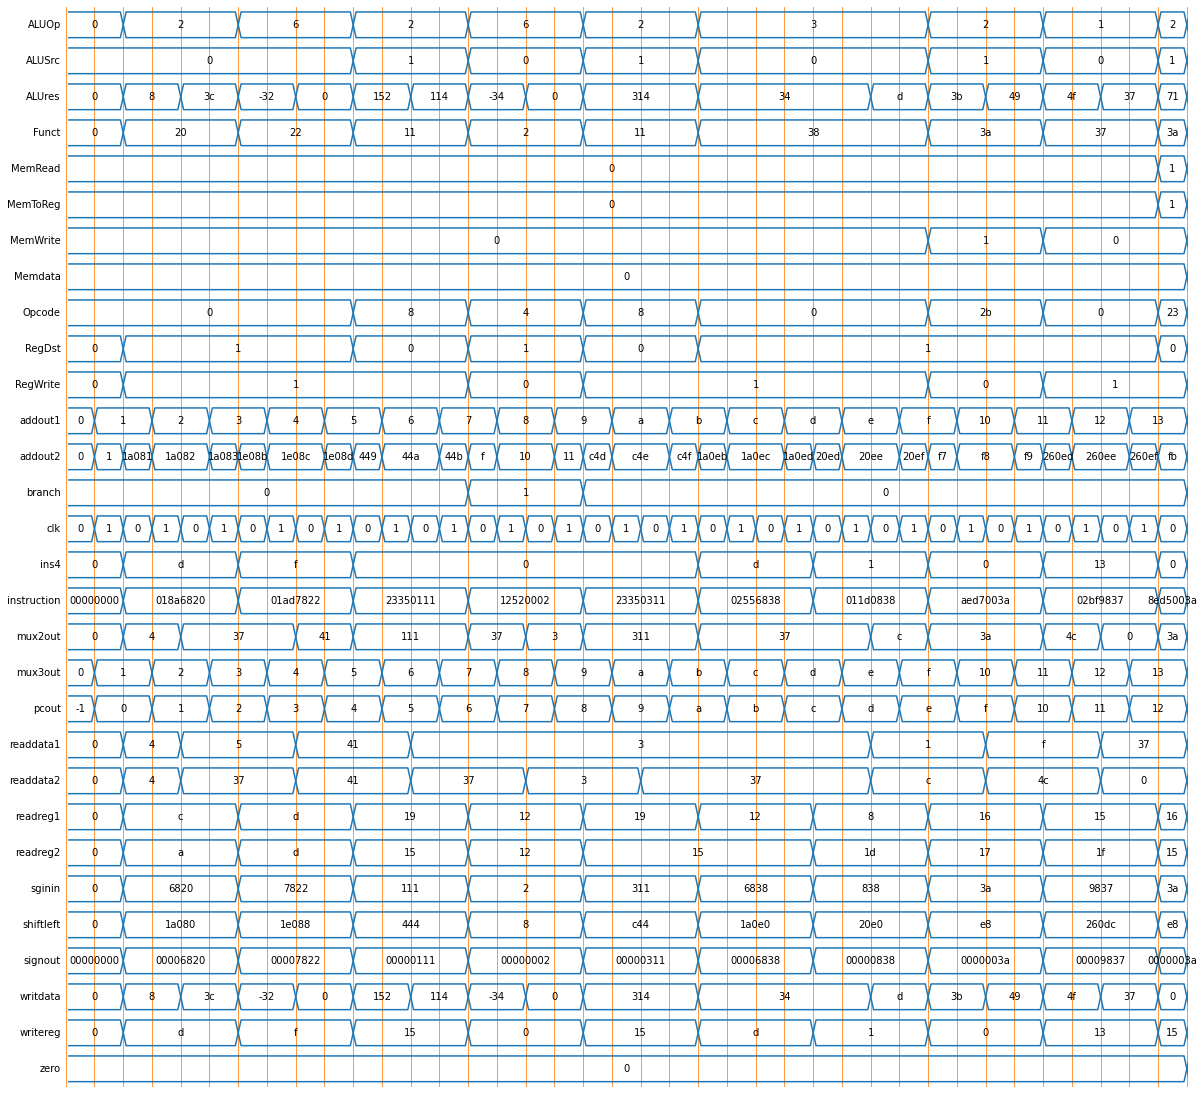

In [ ]:
print("pc")
x = pc(mux3out,pcout,clk)
print("add1")
y = add1(addout1,pcout)
print("insmemory")
z = insmemory(pcout,instruction,clk)
print("decode")
w = decode(instruction,Opcode,readreg1,readreg2,ins4,sginin,Funct)
print("Control")
m = Control(Opcode,Funct,RegDst,RegWrite,ALUSrc,ALUOp,MemWrite,MemRead,MemToReg,branch)
print("mux1")
n = mux1(readreg2,ins4,RegDst,writereg)
print("registers")
v = registers(readreg1,readreg2,writereg,writdata,RegWrite,readdata1,readdata2,clk)
print("signextend")
c = signextend(sginin,signout)
print("mux2")
d = mux2(readdata2,signout,ALUSrc,mux2out)
print("ALU")
e = ALU(readdata1,mux2out,ALUOp,ALUres,zero)
print("shift")
f = shift(signout,shiftleft)
print("add2")
g = add2(addout1,shiftleft,addout2)
print("mux3")
k = mux3(addout1,addout2,zero,branch,mux3out)
print("datamemory")
l = datamemory(ALUres,readdata2,MemWrite,MemRead,Memdata,clk)
print("mux4")
t = mux4(Memdata,ALUres,MemToReg,writdata)

Peeker(mux3out,'mux3out')
Peeker(clk,'clk')
Peeker(pcout,'pcout')
Peeker(addout1,'addout1')
Peeker(instruction,'instruction')
Peeker(Opcode,'Opcode')
Peeker(readreg1,'readreg1')
Peeker(readreg2,'readreg2')
Peeker(ins4,'ins4')
Peeker(sginin,'sginin')
Peeker(Funct,'Funct')
Peeker(RegDst,'RegDst')
Peeker(RegWrite,'RegWrite')
Peeker(ALUSrc,'ALUSrc')
Peeker(ALUOp,'ALUOp')
Peeker(MemWrite,'MemWrite')
Peeker(MemRead,'MemRead')
Peeker(MemToReg,'MemToReg')
Peeker(branch,'branch')
Peeker(writereg,'writereg')
Peeker(writdata,'writdata')
Peeker(readdata1,'readdata1')
Peeker(readdata2,'readdata2')
Peeker(signout,'signout')
Peeker(mux2out,'mux2out')
Peeker(ALUres,'ALUres')
Peeker(zero,'zero')
Peeker(shiftleft,'shiftleft')
Peeker(addout2,'addout2')
Peeker(Memdata,'Memdata')

def test2():
    @instance
    def invert():
        for i in range(20):
            clk.next = 0
            yield delay(1)
            clk.next = 1
            yield delay(1)

    return instances()


sim = Simulation(x,y,z,w,m,n,v,c,d,e,f,g,k,l,t,test2(), *Peeker.instances())

# Run the simulation.
sim.run()
Peeker.show_waveforms()
Peeker.to_html_table()
Peeker.clear()